In [91]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import ac3airborne
import typhon as ty
import src

# use typhon ploting style
plt.style.use(ty.plots.styles.get('typhon'))

In [48]:
cat, meta, credentials, kwds = src.get_ac3_meta()

In [88]:
p5_all_campaigns = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/all_campaigns_P5_lwp_v4.nc')
p5_all_campaigns = p5_all_campaigns.dropna('time')
era5_all_campaigns = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/all_campaigns_ERA5_lwp_v2.nc')
aqua_all_campaigns = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/all_campaigns_P5_MODIS_aqua_lwp_v2.nc')
terra_all_campaigns = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/all_campaigns_P5_MODIS_terra_lwp_v2.nc')
amsr_all_campaigns = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/all_campaigns_P5_AMSR_lwp_v4.nc')

p5_acloud = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/ACLOUD_allRFs_P5_lwp_v4.nc')
p5_acloud = p5_acloud.dropna('time')
p5_aflux = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/AFLUX_allRFs_P5_lwp_v4.nc')
p5_aflux = p5_aflux.dropna('time')
p5_mosaic = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/MOSAiC-ACA_allRFs_P5_lwp_v4.nc')
p5_mosaic = p5_mosaic.dropna('time')
p5_haloac3 = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/HALO-AC3_allRFs_P5_lwp_v4.nc')
p5_haloac3 = p5_haloac3.dropna('time')

era5_acloud = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/ACLOUD_allRFs_P5_ERA5_lwp_v2.nc')
era5_acloud = era5_acloud.sel(time=p5_acloud.time,drop=True)
era5_aflux = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/AFLUX_allRFs_P5_ERA5_lwp_v2.nc')
era5_aflux = era5_aflux.sel(time=p5_aflux.time,drop=True)
era5_mosaic = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/MOSAiC-ACA_allRFs_P5_ERA5_lwp_v2.nc')
era5_mosaic = era5_mosaic.sel(time=p5_mosaic.time,drop=True)
era5_haloac3 = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/HALO-AC3_allRFs_P5_ERA5_lwp_v2.nc')
era5_haloac3 = era5_haloac3.sel(time=p5_haloac3.time,drop=True)

aqua_acloud = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/ACLOUD_allRFs_P5_MODIS_aqua_lwp_v2.nc')
aqua_aflux = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/AFLUX_allRFs_P5_MODIS_aqua_lwp_v2.nc')
aqua_mosaic = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/MOSAiC-ACA_allRFs_P5_MODIS_aqua_lwp_v2.nc')
aqua_haloac3 = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/HALO-AC3_allRFs_P5_MODIS_aqua_lwp_v2.nc')

terra_acloud = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/ACLOUD_allRFs_P5_MODIS_terra_lwp_v2.nc')
terra_aflux = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/AFLUX_allRFs_P5_MODIS_terra_lwp_v2.nc')
terra_mosaic = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/MOSAiC-ACA_allRFs_P5_MODIS_terra_lwp_v2.nc')
terra_haloac3 = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/HALO-AC3_allRFs_P5_MODIS_terra_lwp_v2.nc')

amsr_acloud = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/ACLOUD_allRFs_P5_AMSR_lwp_v4.nc')
amsr_aflux = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/AFLUX_allRFs_P5_AMSR_lwp_v4.nc')
amsr_mosaic = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/MOSAiC-ACA_allRFs_P5_AMSR_lwp_v4.nc')
amsr_haloac3 = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/HALO-AC3_allRFs_P5_AMSR_lwp_v4.nc')

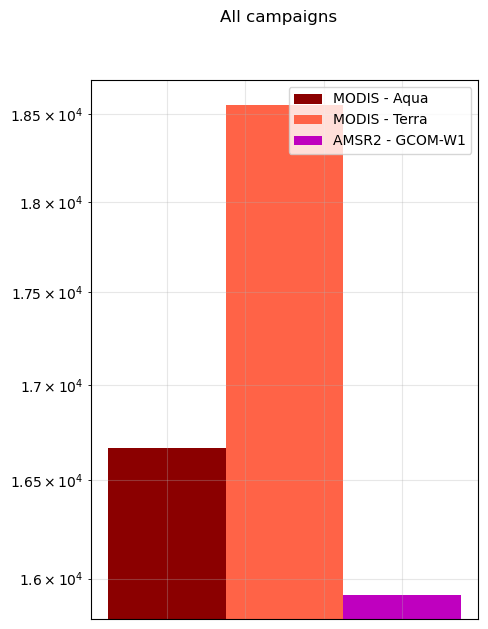

In [85]:
fig, ax = plt.subplots(figsize=(5,7))

width = 0.15

labels = ['MODIS - Aqua','MODIS - Terra','AMSR2 - GCOM-W1']
colors = ['darkred','tomato','m']

#ax.bar(0,len(p5_all_campaigns.dropna('time').time),width = width,color=colors[0],label=labels[0])
ax.bar(0,len(aqua_all_campaigns.time),width = width,color=colors[0],label=labels[0])
ax.bar(0 + 1*width,len(terra_all_campaigns.time),width = width,color=colors[1],label=labels[1])
ax.bar(0 + 2*width,len(amsr_all_campaigns.time),width = width,color=colors[2],label=labels[2])

ax.set_yscale('log')
ax.grid(alpha=0.3,which='both',axis="both")
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

fig.suptitle('All campaigns')

ax.legend()

#plt.savefig(f'/home/mringel/lwp_project/figures/Retrieved_LWP_vs_ERA5_histograms_all_campaigns_v3.png',
#            bbox_inches='tight',
#            dpi=200)

In [89]:
collocations_era5 = [len(era5_acloud.time),len(era5_aflux.time),len(era5_mosaic.time),len(era5_haloac3.time)]
collocations_aqua = [len(aqua_acloud.time),len(aqua_aflux.time),len(aqua_mosaic.time),len(aqua_haloac3.time)]
collocations_terra = [len(terra_acloud.time),len(terra_aflux.time),len(terra_mosaic.time),len(terra_haloac3.time)]
collocations_amsr = [len(amsr_acloud.time),len(amsr_aflux.time),len(amsr_mosaic.time),len(amsr_haloac3.time)]

In [102]:
np.sum(collocations_era5)

144728

In [103]:
np.sum(collocations_aqua)

16665

In [104]:
np.sum(collocations_terra)

18557

In [105]:
np.sum(collocations_amsr)

15921

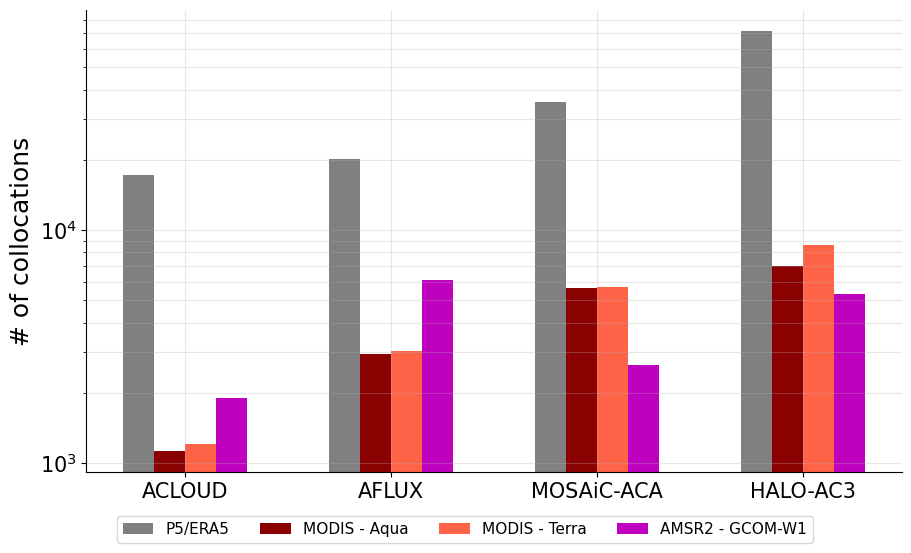

In [95]:
fig, ax = plt.subplots(figsize=(9,5))

X = np.arange(4)
width = 0.15

labels = ['P5/ERA5','MODIS - Aqua','MODIS - Terra','AMSR2 - GCOM-W1']
colors = ['grey','darkred','tomato','m']
campaigns = ['ACLOUD','AFLUX','MOSAiC-ACA','HALO-AC3']

ax.bar(X + 0.00, collocations_era5, color = colors[0], width = width, label = labels[0])
ax.bar(X + 1*width, collocations_aqua, color = colors[1], width = width, label = labels[1])
ax.bar(X + 2*width, collocations_terra, color = colors[2], width = width, label = labels[2])
ax.bar(X + 3*width, collocations_amsr, color = colors[3], width = width, label = labels[3])

ax.set_xticks(X + 1.5*width, campaigns)
ax.set_ylabel('# of collocations')
ax.grid(alpha=0.3,which='both',axis="both")

handles, labels = ax.get_legend_handles_labels()
lgd = fig.legend(handles, labels, prop={'size': 11}, loc='lower center', ncol=4, bbox_to_anchor=(0.51,-0.09))

ax.set_yscale('log')

plt.savefig('/home/mringel/lwp_project/figures/figures4paper/histogram_number_of_collocations_each_campaign.png',
            bbox_inches='tight',
            dpi=200)